# 4 - Training Model

So far we have treated Machine Learning models and their training algorithms mostly like black boxes. If you went through some of the exercises in the previous chapters, you may have been surprised by how much you can get done without knowing anything about what’s under the hood: you optimized a regression system, you improved a digit image classifier, and you even built a spam classifier from scratch — all this without knowing how they actually work. Indeed, in many situations you don’t really need to know the implementation details. 

However, having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task. Understanding what’s under the hood will also help you debug issues and perform error analysis more efficiently. Lastly, most of the topics discussed in this chapter will be essential in understanding, building, and training neural networks 

In this chapter, we will start by looking at the Linear Regression model, one of the simplest models there is. We will discuss two very different ways to train it: 

    * Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set). 
    
    * Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method.

Next we will look at Polynomial Regression, a more complex model that can fit nonlinear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case, using learning curves, and then we will look at several regularization techniques that can reduce the risk of overfitting the training set. 

# Warning

There will be quite a few math equations in this chapter, using basic notions of linear algebra and calculus. To understand these equations, you will need to know what vectors and matrices are, how to transpose them, what the dot product is, what matrix inverse is, and what partial derivatives are. If you are unfamiliar with these concepts, please go through the linear algebra and calculus introductory tutorials available as Jupyter notebooks in the online supplemental material. For those who are truly allergic to mathematics, you should still go through this chapter and simply skip the equations; hopefully, the text will be sufficient to help you understand most of the concepts.

# Linear Regression

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term), as shown in figure below:

<img src="img1.PNG">

    * ŷ is the predicted value.
    * n is the number of features.
    * xi is the ith feature value.
    * θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn). 
    
This can be written much more concisely using a vectorized form, as shown in below equation:

<img src="img2.PNG">

Okay, that’s the Linear Regression model, so now how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. The most common performance measure of a regression model is the Root Mean Square Error (RMSE) .Therefore, to train a Linear Regression model, you need to find the value of θ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

The MSE of a Linear Regression hypothesis hθ on a training set X is calculated using equation below:
<img src="img2.PNG">


# The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution — in other words, a mathematical equation that gives the result directly. This is called the Normal Equation.

<img src="img4.PNG">

Let's generate some linear-looking data to test this equation:

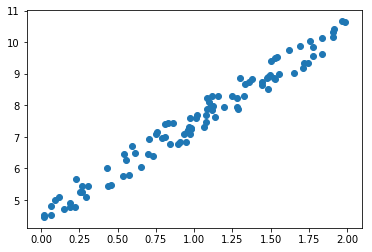

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

X=2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)
plt.scatter(X,y)

Now let’s compute theta using the Normal Equation. We will use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:


In [2]:
X_b=np.c_[np.ones((100,1)),X]

theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.46997664],
       [3.0122025 ]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 3.865 and θ1 = 3.139. Close enough, but the noise made it impossible to recover the exact parameters of the original function. Now you can make predictions using theta :


In [4]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.46997664],
       [10.49438164]])

[0, 2, 0, 15]

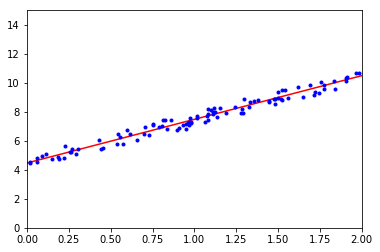

In [5]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

The equivalent code using Scikit-Learn looks like this:

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)

[4.46997664] [[3.0122025]]


In [7]:
lin_reg.predict(X_new)

array([[ 4.46997664],
       [10.49438164]])

# Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum! Concretely, you start by filling θ with random values (this is called random initialization), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

<img src="img5.PNG">

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

<img src="img6.PNG">

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution:

<img src="img7.PNG">

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult. The following figure shows the two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.

<img src="img8.PNG">

Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.4 These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. The figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

<img src="img9.PNG">

As you can see, on the left the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.


This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model’s parameter space: the more parameters a model has, the more dimensions this space has, and the harder the search is: searching for a needle in a 300-dimensional haystack is much trickier than in three dimensions. Fortunately, since the cost function is convex in the case of Linear Regression, the needle is simply at the bottom of the bowl.

# Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. This is called a partial derivative. It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions). Equation below computes the partial derivative of the cost function with regards to parameter θj.

<img src="img10.PNG">

Instead of computing these gradients individually, you can use Equation 4-6 to compute them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial derivatives of the cost function (one for each model parameter).

##### Warning: 
Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation.


Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the learning rate η comes into play:6 multiply the gradient vector by η to determine the size of the downhill step.

<img src="img12.PNG">

Let’s look at a quick implementation of this algorithm:


In [8]:
eta=0.1 #learning rate
n_iterations=10000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [9]:
theta

array([[4.46997664],
       [3.0122025 ]])

Hey, that’s exactly what the Normal Equation found! Gradient Descent worked perfectly. But what if you had used a different learning rate eta? Below figure shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point).

<img src="img13.PNG">

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge. 

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny — that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance) — because this happens when Gradient Descent has (almost) reached the minimum.

### CONVERGENCE RATE

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), it can be shown that Batch Gradient Descent with a fixed learning rate has a convergence rate of O(1/iteration) . In other words, if you divide the tolerance ϵ by 10 (to have a more precise solution), then the algorithm will have to run about 10 times more iterations.

# Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.) 

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (see Figure 4-9). So once the algorithm stops, the final parameter values are good, but not optimal.

<img src="img14.PNG">

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is
slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

This code implements Stochastic Gradient Descent using a simple learning schedule:

In [16]:
n_epochs=50
t0,t1=5,50  # learning schedule hyperparameter

def learning_schedule(t):
    return t0/(t+t1)


theta=np.random.randn(2,1) # random initilization

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

In [17]:
theta

array([[4.47137867],
       [3.01312072]])

Below figure shows the first 10 steps of training (notice how irregular the steps are).

<img src="img15.PNG">

Note that since instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set, then go through it instance by instance, then shuffle it again, and so on. However, this generally converges more slowly. 

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function. The following code runs 50 epochs, starting with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one), and it does not use any regularization (penalty=None; more details on this shortly):


In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [21]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.47327022]), array([3.01362017]))

# Mini-batch Gradient Descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression as we saw earlier). Below figure shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

<img src="img16.PNG">

Let’s compare the algorithms we’ve discussed so far for Linear Regression8 (recall that m is the number of training instances and n is the number of features);

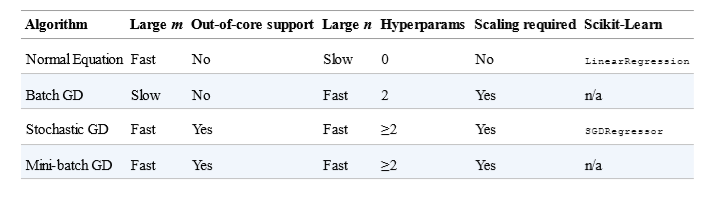



### The BIAS/VARIANCE tradeoff

An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors: 

Bias:
    This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
    
Variance:
    This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data. 
    
Irrducible error:
    This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers). 
    
Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.